In [1]:
#Basics 
import numpy as np
import pandas as pd 
import math, random
import sys, os 
import sklearn
from scipy import stats 
import scipy
import matplotlib 
import matplotlib.pyplot as plt 
%matplotlib inline

#Google Drive setup 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Navigate to directory with Google Drive
%cd /content/drive/Shareddrives/CS\ 272\ PCOS\ FL/Synthetic\ Data\ Generation\ /

/content/drive/Shareddrives/CS 272 PCOS FL/Synthetic Data Generation 


In [3]:
#Keep knobs
# QUANTILE_WIDTH = 0.3 #Values in range [0, 0.5) -> lower number = easier learning
RESAMPLING_CONSTANT = 5 #Values in range [1, +inf] -> higher number = easier learning 
COVARIANCE_STRENGTH = 1 #Values in range (0, +inf) but best to keep around/below 1 -> lower number = easier learning 
SD_STRENGTH = 1 #lower number = easier learning 
PROPORTION_TRUE_TREATMENT = 0.9 #Values in range [0, 1] -> higher number = easier learning 
PER_CLINIC_NOISE_SPREAD = 1.5 #Values in range [0, +inf) -> lower number = easier learning 
HORMONE_MEASUREMENT_NOISE = 1 #Values in range [0, +inf) -> lower number = easier learning 
SYMPTOM_MASK_CONST = 3 #lower number = easier learning 

In [4]:
#Set one seed to control whole document
np.random.seed(741685)

In [5]:
# Dictionary of hormone distributions
# Mean, SD
hormones = {
    "lh_fsh_ratio" : (1.7,0.7),
    "estradiol" : (87.6,21.1),
    "testosterone" : (71.4,27.9),
    "progesterone_17oh" : (1.6,1),
    "dheas" : (777.5,1135.8),
    "androstenedione" : (5.2,4.3),
    "amh" : (76.0, 36.3)
}

In [6]:
hormone_ranges_dic = {}

# Generate the ranges for each hormone
for hormone, dist in hormones.items():
    mean, sd = dist
    # Get the number of ranges to create
    hormone_num_ranges = np.random.randint(5,11)
    print("Number ranges "+str(hormone_num_ranges))
    hormone_ranges = []
    
    # Get the proportion less than 0
    neg_prop = scipy.stats.norm.cdf(0, loc=mean, scale=sd)
    pos_prop = 1 - neg_prop
    
    # Set the initial percentiles
    lower_per = neg_prop
    upper_per = neg_prop + pos_prop / hormone_num_ranges
    
    # Get the boundaries of each range
    for i in range(0,hormone_num_ranges):
        
        # Get the current percentiles
        if(i != 0):
            lower_per = upper_per
            upper_per = upper_per + pos_prop / hormone_num_ranges
        
        mid_per = (lower_per + upper_per)/2
        
        # Get the values of those percentiles
        lower_val = max(scipy.stats.norm.ppf(lower_per, loc=mean, scale=sd),0)
        upper_val = min(scipy.stats.norm.ppf(upper_per, loc=mean, scale=sd),mean+4*sd)
        middle_val = scipy.stats.norm.ppf(mid_per, loc=mean, scale=sd)
        hormone_ranges.append((lower_val, upper_val, middle_val))
    
    hormone_ranges_dic[hormone] = hormone_ranges
    
for hormone, val_range in hormone_ranges_dic.items():
    print("*************")
    print(hormone)
    print(val_range)
    print("*************")

Number ranges 9
Number ranges 9
Number ranges 8
Number ranges 5
Number ranges 9
Number ranges 6
Number ranges 10
*************
lh_fsh_ratio
[(0, 0.8699313140385306, 0.6273303799911605), (0.8699313140385306, 1.1784567174934693, 1.0402891953161857), (1.1784567174934693, 1.4081898465663012, 1.2987538299163248), (1.4081898465663012, 1.6096580629931667, 1.5108917343317565), (1.6096580629931667, 1.8037693838738167, 1.7066495000138242), (1.8037693838738167, 2.0063802635692856, 1.9029390694870993), (2.0063802635692856, 2.2392643606287534, 2.1170222471114526), (2.2392643606287534, 2.5575692455319476, 2.380742874031894), (2.5575692455319476, 4.5, 2.817889736356375)]
*************
*************
estradiol
[(0, 61.84612290323542, 53.9860157037583), (61.84612290323542, 71.46553534780895, 67.18856637762423), (71.46553534780895, 78.51229246338411, 75.16323268009846), (78.51229246338411, 84.65260238129726, 81.64579439207088), (84.65260238129726, 90.5482790577141, 87.60043643937291), (90.5482790577141, 

In [7]:
# np.random.seed(10)
ocps = np.arange(1,11)
ocp1={}
ocp2={}
ocp3={}
ocp4={}
ocp5={}
ocp6={}
ocp7={}
ocp8={}
ocp9={}
ocp10={}
ocp_dic = [ocp1,ocp2,ocp3,ocp4,ocp5,ocp6,ocp7,ocp8,ocp9,ocp10]
for hormone, val_ranges in hormone_ranges_dic.items():
    np.random.shuffle(ocps)
    for i in range(len(val_ranges)):
        (ocp_dic[i-1])[hormone] = val_ranges[i]
    for i in range(len(val_ranges),10):
        (ocp_dic[i-1])[hormone] = "NC"

In [8]:
ocp_dic

[{'lh_fsh_ratio': (0.8699313140385306, 1.1784567174934693, 1.0402891953161857),
  'estradiol': (61.84612290323542, 71.46553534780895, 67.18856637762423),
  'testosterone': (39.91965455227872, 52.92578733471443, 47.08742381850135),
  'progesterone_17oh': (0.9059946705884688,
   1.430952335524231,
   1.1830555069765727),
  'dheas': (279.4275747960521, 531.2850906850412, 407.6361390809437),
  'androstenedione': (2.4476670727842946,
   4.208819828665868,
   3.367032642907436),
  'amh': (32.67477443504756, 47.29217083031238, 40.70150395944589)},
 {'lh_fsh_ratio': (1.1784567174934693, 1.4081898465663012, 1.2987538299163248),
  'estradiol': (71.46553534780895, 78.51229246338411, 75.16323268009846),
  'testosterone': (52.92578733471443, 62.75089965001584, 58.0467002398079),
  'progesterone_17oh': (1.430952335524231,
   1.9105265579415995,
   1.6687348113097689),
  'dheas': (531.2850906850412, 771.4590855442336, 652.075073672365),
  'androstenedione': (4.208819828665868, 5.812523728359134, 5.01

In [9]:
#Load in covariance matrix and prepare: 
symmetric_cov = np.load("cov_matrix.npy")
symmetric_cov = symmetric_cov * (COVARIANCE_STRENGTH*(np.ones((7,7)) - np.identity(7)) + SD_STRENGTH*np.identity(7))
w, v = np.linalg.eig(symmetric_cov)
sigmas = np.sqrt(w) * v #get covariance-corrected SDs
print(f"Number of negative covariances: {np.sum(np.where(symmetric_cov < 0, 1, 0))} (of 49 total covariances)")

Number of negative covariances: 22 (of 49 total covariances)


In [10]:
hormones
pcos_hormone_sds = np.array([0.7, 21.1, 27.9, 1, 1135.8, 4.3, 36.3])

In [11]:
N = 10000
all_patients = {}
for i, curr_ocp in enumerate(ocp_dic):
    mu = []
    for hormone, range_set in curr_ocp.items():
        if(range_set != "NC"):
            # Use the midpoint as the mean
            mu.append(range_set[2])
        else:
            # Use the mean of the overall distribution
            mu.append((hormones[hormone])[0])
    
    if np.any(np.array(mu) < 0):
        print("Some means are negative")
        print(mu)
    
    
    # get the mean vector
    mu_vec =np.array([mu]).T

    # get "square root" of covariance matrix via eigenfactorization
    w, v = np.linalg.eig(symmetric_cov)
    sigma = np.sqrt(w) * v

    # generate hormone data
    patients = (sigma @ np.random.normal(loc=0, scale=(1/RESAMPLING_CONSTANT), size=(len(mu), 10000)) + mu_vec).T
    #print(f'Proportion of negatives: {np.mean(np.where(patients < 0, 1, 0))}')

    #Generate symptoms
    hormone_zscores = (patients - np.repeat(mu_vec.T, 10000, axis=0))/ np.repeat(pcos_hormone_sds[np.newaxis, :], 10000, axis=0)

    irreg_mens = 0.8+0.05*hormone_zscores[:, 0][:, np.newaxis]
    cysts = 0.75+0.05*hormone_zscores[:, 1][:, np.newaxis]
    hirsutism = 0.75+0.05*hormone_zscores[:, 2][:, np.newaxis]
    acne = 0.25+0.1*np.average(hormone_zscores[:, 2:4], axis=1)[:, np.newaxis]
    anxiety = 0.42+0.1*hormone_zscores[:, 3][:, np.newaxis]
    depression = 0.37+0.1*np.average(-1*np.concatenate((hormone_zscores[:, 1][:, np.newaxis], hormone_zscores[:, 3][:, np.newaxis]), axis=1), axis=1)[:, np.newaxis]

    symptom_probs = np.concatenate((irreg_mens, #incr lh-fsh ratio -> irreg mens
                                cysts, #incr estrogen -> cysts
                                hirsutism, #high testosterone -> hirsutism 
                                acne, #high testosterone + progesterone -> acne
                                anxiety, #high progesterone -> anxiety 
                                depression), #low estrogen + progesterone -> depression
                               axis=1)
    symptom_assignments = np.random.uniform(size=symptom_probs.shape)
    #Symptom binary variables 
    symptom_assignments = np.where(symptom_assignments < symptom_probs, 1, 0)

    patients = pd.DataFrame(np.concatenate((patients, symptom_assignments), axis=1))
    patients.columns = ["lh_fsh_ratio","estradiol","testosterone","progesterone_17oh","dheas","androstenedione","amh",
                        'irreg_menstr', 'cysts', 'hirsutism', 'acne', 'anxiety', 'depression']
    all_patients[i+1] = patients
    true_treatments = np.repeat(i+1, 10000).reshape(-1,1)
    random_treatments = np.where(np.random.uniform(size=(10000,1)) < PROPORTION_TRUE_TREATMENT, 0, 1) * np.random.randint(1,11, size=(10000,1))
    true_treatments = np.where(random_treatments == 0, true_treatments, 0)
    #print(np.average(random_treatments+true_treatments))
    
    patients['treatment'] = random_treatments + true_treatments
    patients['response_type'] = np.repeat(i+1, 10000)
    patients = patients[['response_type', "lh_fsh_ratio","estradiol","testosterone","progesterone_17oh","dheas","androstenedione","amh",
                        'irreg_menstr', 'cysts', 'hirsutism', 'acne', 'anxiety', 'depression', 'treatment']]
    print(np.unique(patients.treatment.values))

[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]


In [12]:
###Generating 15 clinics - start by getting proportions of patient response types
#Use gamma distribution instead of random uniform to generate highly unequal proportions 
#of patient response types in different clinics
clinic_response_type_proportions = np.random.gamma(shape=1.5, scale=1.5, size=(25,10))
clinic_response_type_proportions /= np.repeat(np.sum(clinic_response_type_proportions, axis=1)[:, np.newaxis], 10, axis=1)

#Now, generate the number of patients in each of 15 clinics using random normal distribution
#Assume 1500 +/- 300 patients per practice
clinic_sizes = np.repeat(np.round(np.random.normal(loc=1500, scale=300, size=(25,1)), 0), 10, axis=1)

#Finally, do element-wise multiplication to find the number of patients per response type to sample per clinic
num_responsetypes_per_clinic = np.round(clinic_response_type_proportions * clinic_sizes, 0).astype('int') - 10
num_responsetypes_per_clinic = np.where(num_responsetypes_per_clinic < 0, 0, num_responsetypes_per_clinic) #1000*np.ones((15, 10)).astype('int') 

In [13]:
num_responsetypes_per_clinic

array([[ 39, 125, 120, 204,  44,  32, 270, 128,  73, 249],
       [ 64, 215, 109,   0,  92,  69,  78,   5,   0,  74],
       [143,  32, 222, 206, 126, 191, 219,  80,  10, 130],
       [172,  75,  58, 215, 476,  94,  55, 134,  76, 145],
       [ 26,  97,  87, 288, 152,  11, 381, 119, 155, 558],
       [172, 187, 114,  83,  83,  58, 129,  82, 198,  48],
       [116, 452, 153,  22,   5, 198,  16, 146, 355,  31],
       [  0,   7, 133,  82, 244,  18, 248,  35, 238,  68],
       [133, 124, 232,  25, 220,  51, 169, 234,  52,  54],
       [ 27, 112, 717, 189,  38, 341, 272,  59,  58,  54],
       [ 17,  37, 235, 195,  68,  87,   0,   8, 336, 188],
       [166, 168,   0, 239,  27, 217, 271,  62,  84,  73],
       [162,  33, 366, 216,  34, 131, 103, 151,  86,  82],
       [107, 152,  91,  87, 277, 340, 154, 156, 196, 133],
       [268, 198,  91,  34, 242, 183, 282, 179, 111, 380],
       [ 42, 252,  78,   1, 258, 136,  22,  64, 168,  60],
       [136, 253,  33, 147, 188,  96,  76, 139,  99,  75

In [14]:
#Because the response types are randomly generated, no need to reshuffle the data
clinics = {}
prev_idxs = np.zeros((10,)).astype('int')
for clinic in range(25):
  #Slice a row from the array specifying number of each patient response type for the clinic
  #This will specify how many more rows of each patient response type dataframe to sample 
  #and concatenate to form one clinic's worth of data
  next_idxs = prev_idxs + num_responsetypes_per_clinic[clinic]

  #Fetch rows from the appropriate response type-specific dataframes to make clinic df
  clinic_patients = None
  for i in range(10):
    if i==0:
      clinic_patients = all_patients[i+1].iloc[prev_idxs[i]:next_idxs[i]]
    else:
      clinic_patients = pd.concat([clinic_patients, all_patients[i+1].iloc[prev_idxs[i]:next_idxs[i]]], ignore_index=True)
  clinics[clinic] = clinic_patients
  #Set new index positions for the next round of row slicing
  prev_idxs = next_idxs

In [15]:
#Add noise per clinic
#Use gamma distribution to select "average percentage hormone noise" and 
#"average symptom masking probability"

clinic_hormone_percent_noise = HORMONE_MEASUREMENT_NOISE*PER_CLINIC_NOISE_SPREAD*np.random.gamma(shape=9, scale=0.5, size=(25))
clinic_symptom_mask_prob = np.random.gamma(shape=9, scale=0.5, size=(25))

for i in range(25):
  print(f"Clinic {i+1} will have mean 0, SD ({clinic_hormone_percent_noise[i]}% hormone mean) noise added to hormone metrics, and {clinic_symptom_mask_prob[i]}% of symptoms randomly masked")

Clinic 1 will have mean 0, SD (5.023633909874801% hormone mean) noise added to hormone metrics, and 3.4454896567889564% of symptoms randomly masked
Clinic 2 will have mean 0, SD (12.143803403692253% hormone mean) noise added to hormone metrics, and 5.61994930088875% of symptoms randomly masked
Clinic 3 will have mean 0, SD (2.900068129897757% hormone mean) noise added to hormone metrics, and 5.348473038290047% of symptoms randomly masked
Clinic 4 will have mean 0, SD (6.109578939405953% hormone mean) noise added to hormone metrics, and 4.944650342141734% of symptoms randomly masked
Clinic 5 will have mean 0, SD (9.4091729157857% hormone mean) noise added to hormone metrics, and 6.520141643556959% of symptoms randomly masked
Clinic 6 will have mean 0, SD (4.043660201757868% hormone mean) noise added to hormone metrics, and 4.227876010980739% of symptoms randomly masked
Clinic 7 will have mean 0, SD (5.940145240686341% hormone mean) noise added to hormone metrics, and 3.2551057818628686%

In [16]:
#Add noise per clinic
for clinic, patients in clinics.items():
  #For hormone measurements
  for hormone in ['lh_fsh_ratio', 'estradiol', 'testosterone', 'progesterone_17oh', 'dheas', 'androstenedione', 'amh']:
    measurements = patients[hormone].values 
    #Create noise vector for each hormone independently, add to hormone measurements 
    noise = np.random.normal(loc=0, scale=0.01*clinic_hormone_percent_noise[clinic]*np.mean(measurements), size=measurements.shape)
    patients[hormone] = np.where(measurements + noise < 0, 0, measurements + noise).astype('float')
  ##For symptoms - not yet implemented
  for symptom in ['irreg_menstr', 'cysts', 'hirsutism', 'acne', 'anxiety', 'depression']:
    measurements = patients[symptom].values #* 0
    #Set all symptoms to 0
    #patients[symptom] = measurements

    #Mask out symptoms at the clinic-specified rate 
    mask_prob = np.random.uniform(size=measurements.shape)
    patients[symptom] = np.where(mask_prob < 0.01*SYMPTOM_MASK_CONST*clinic_symptom_mask_prob[clinic], 2, measurements).astype('int')
  ##Set patient response type label (DO NOT USE AS A FEATURE), treatment label as ints 
  patients['treatment'] = patients.treatment.values.astype('int')
  patients['response_type'] = patients.response_type.values.astype('int')
  patients.to_csv(f'clinic_datasets_sophie_hormone_generation/clinic_{clinic}.csv', index=False)

In [17]:
np.unique(clinics[1].loc[clinics[1].response_type==6].treatment.values)

array([2, 3, 5, 6, 8, 9])

In [18]:
np.unique(clinics[0].loc[clinics[0].response_type==1].treatment.values)

array([1, 2, 7, 9])

In [19]:
clinics[0]

,lh_fsh_ratio,estradiol,testosterone,progesterone_17oh,dheas,androstenedione,amh,irreg_menstr,cysts,hirsutism,acne,anxiety,depression,treatment,response_type
0,0.852875,69.404651,37.249088,1.193503,91.298718,5.562547,53.361913,0,1,2,0,0,0,1,1
1,0.862117,74.635459,48.026282,0.676553,548.471882,2.996807,37.855591,1,2,1,0,0,0,1,1
2,1.037645,73.195011,53.695967,1.143424,672.317520,2.397739,40.953058,1,1,1,0,0,0,1,1
3,1.297838,59.084527,37.001392,1.270365,879.254107,2.273987,28.527521,1,1,1,1,1,1,1,1
4,1.023792,60.904895,46.490605,1.112884,605.364421,3.357514,38.385804,2,1,1,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,0.320423,37.755732,12.313672,0.448981,328.695124,1.690540,0.000000,1,1,1,0,0,1,10,10
1280,0.831334,54.169063,26.310947,0.662478,492.314954,1.131618,12.634585,1,0,2,1,1,0,10,10
1281,0.722376,49.490430,31.399560,0.638968,350.101161,0.221233,4.864754,1,1,2,0,0,0,10,10
1282,0.412454,55.803845,36.452535,0.244938,0.000000,1.420409,29.913343,1,1,1,0,1,0,10,10


In [20]:
np.average(np.equal(clinics[0].treatment.values, clinics[0].response_type.values))

0.9228971962616822

In [21]:
# patients_df = pd.DataFrame(all_patients)

In [22]:
# patients_df.index = ["lh_fsh_ratio","estradiol","testosterone","progesterone_17oh","dheas","androstenedione","amh"]

In [23]:
patients_df = pd.concat([clinics[i] for i in clinics.keys()], ignore_index=True)

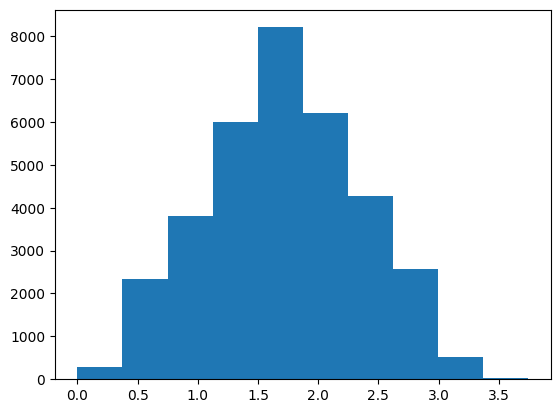

In [24]:
import matplotlib.pyplot as plt
lh_fsh = patients_df["lh_fsh_ratio"]
plt.hist(lh_fsh, bins=10)
plt.show()

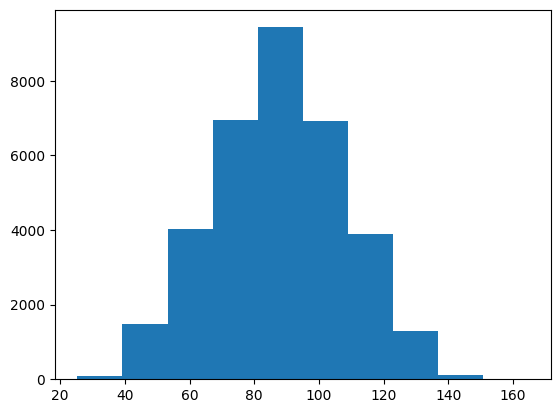

In [25]:
estradiol = patients_df["estradiol"]
plt.hist(estradiol, bins=10)
plt.show()

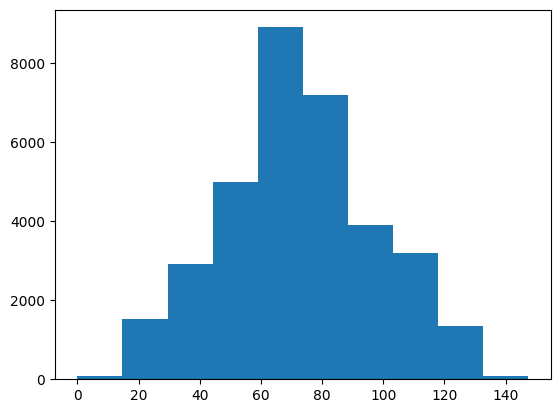

In [26]:
testosterone = patients_df["testosterone"]
plt.hist(testosterone, bins=10)
plt.show()

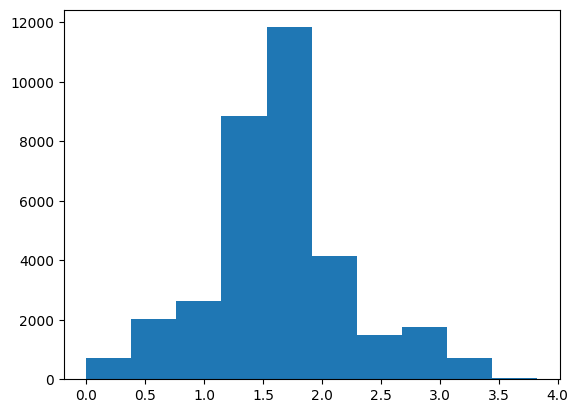

In [27]:
progesterone_17oh = patients_df["progesterone_17oh"]
plt.hist(progesterone_17oh, bins=10)
plt.show()

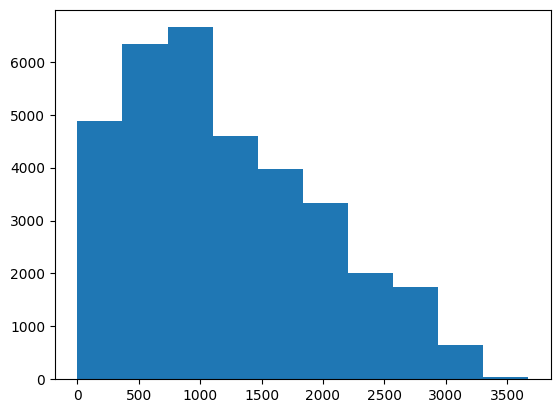

In [28]:
dheas = patients_df["dheas"]
plt.hist(dheas, bins=10)
plt.show()

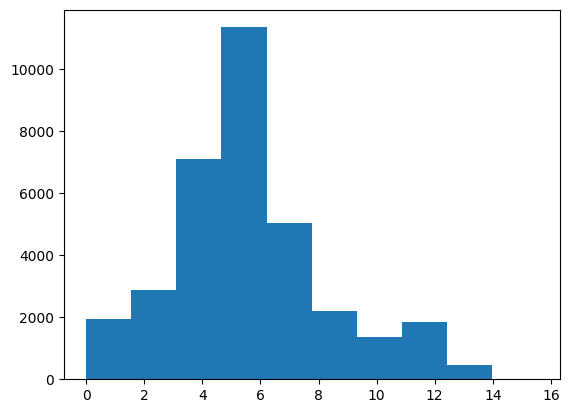

In [29]:
androstenedione = patients_df["androstenedione"]
plt.hist(androstenedione, bins=10)
plt.show()

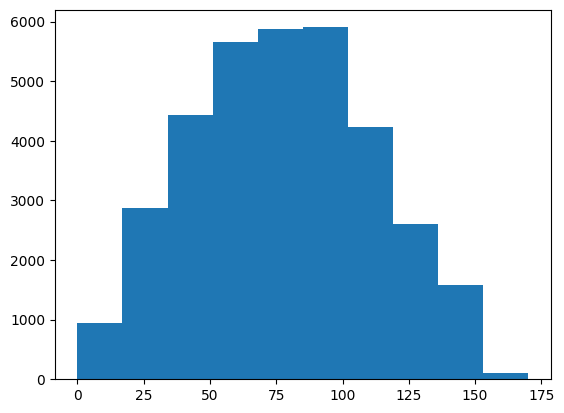

In [30]:
amh = patients_df["amh"]
plt.hist(amh, bins=10)
plt.show()